# XGBoost
In this notebook, we implemented and evaluated an XGBoost model to to predict **auto loan default** (bad_flag).

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from preprocessing import load_data, preprocess_data
from model_evaluation import evaluate_models, tune_hyperparameters, feature_importance, threshold_analysis, cross_val_pr_curve, cross_val_roc_curve
import xgboost as xgb
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

## Load & Preprocess Data

In [2]:
train_path = "/Users/heba/Desktop/Erdos/Training_data.csv"
eval_path = "/Users/heba/Desktop/Erdos/Testing_data.csv"

df_train, df_eval = load_data(train_path, eval_path)
X_train_processed, y_train, X_eval_processed, y_eval, to_drop_corr, cols_to_drop, preprocessor = preprocess_data(df_train, df_eval)

print("Train shape:", X_train_processed.shape)
print("Eval shape:", X_eval_processed.shape)


Train shape: (21348, 28)
Eval shape: (5336, 28)


## XGBoost

In [74]:
# Compute class weight manually
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos


In [75]:
xgb = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}


In [76]:
X_train_df = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())

grid = GridSearchCV(xgb, param_grid, scoring='average_precision', cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train_df, y_train)

print("Best Params:", grid.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:44] WARNING: /Users/runner/work/xgboost/xgboost/src/lear

Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CV Scores: [0.10606061 0.10718686 0.09831709]
Mean CV Score: 0.10385485305032142


/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:               precision    recall  f1-score   support

           0       0.98      0.69      0.81     20390
           1       0.10      0.77      0.18       958

    accuracy                           0.69     21348
   macro avg       0.54      0.73      0.50     21348
weighted avg       0.94      0.69      0.78     21348



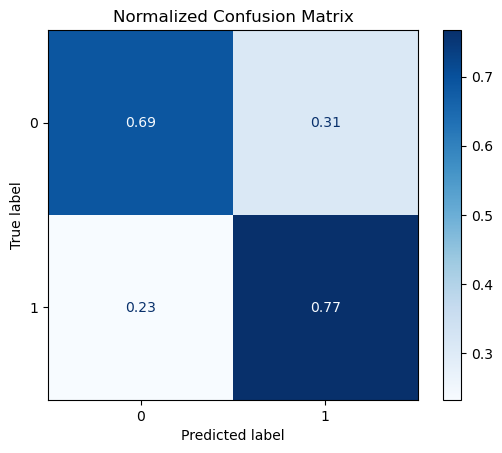

/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:53] WARNING: /Users/runner/work/xgboost/xgboost/src/lear

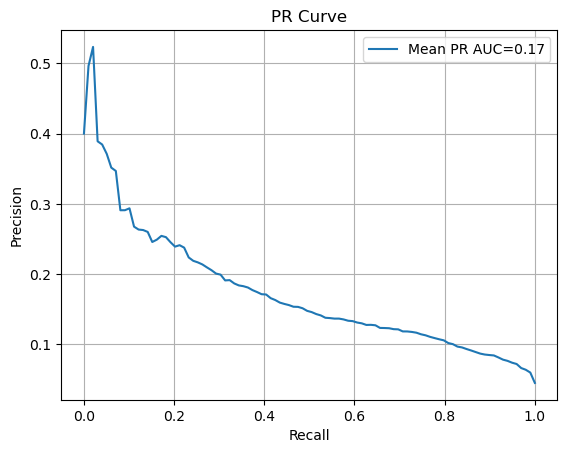

Mean PR AUC: 0.1741


/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:23:55] WARNING: /Users/runner/work/xgboost/xgboost/src/lear

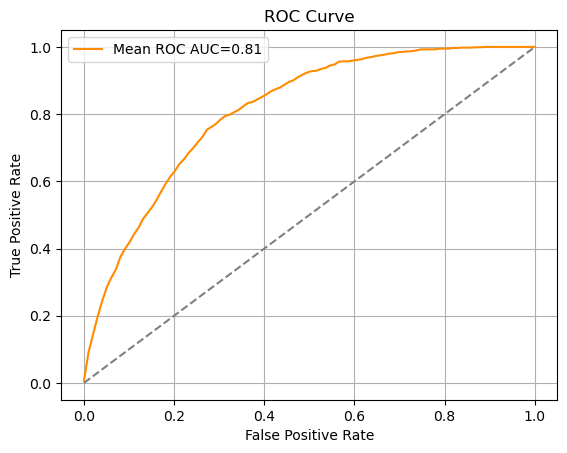

Mean ROC AUC: 0.8111


,precision,recall,f1-score,support
0,0.984383,0.689358,0.810868,20390.000000
1,0.103975,0.767223,0.183132,958.000000
accuracy,0.692852,0.692852,0.692852,0.692852
macro avg,0.544179,0.728290,0.497000,21348.000000
weighted avg,0.944874,0.692852,0.782699,21348.000000


In [77]:
xgb_best = grid.best_estimator_
evaluate_models(xgb_best, X_train_df, y_train)


In [78]:
# On test set
X_test_df = pd.DataFrame(X_eval_processed, columns=preprocessor.get_feature_names_out())
y_pred_test = xgb_best.predict(X_test_df)
print("=== Final Test Set Evaluation ===")
print(classification_report(y_eval, y_pred_test))

=== Final Test Set Evaluation ===
              precision    recall  f1-score   support

           0       0.98      0.69      0.81      5094
           1       0.10      0.76      0.18       242

    accuracy                           0.70      5336
   macro avg       0.54      0.72      0.50      5336
weighted avg       0.94      0.70      0.78      5336

